In [1]:
import openai
openai.api_key = open("openai_key.txt", "r").read()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Read the xlsx file
givaudan_df = pd.read_excel('Givaudan/all_reviews_translated.xlsx')

givaudan_df.head()

,Brand,Product,Product Name,Product URL,Qty Sold,No of Reviews,Avg Rating,Username,Review Date,Translation
0,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,a*****r,11/16/2022,Texture liquid Performance lasts long enough 4...
1,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,f*****r,09/13/2022,Performance Fragrance Suitable For Perfume Tex...
2,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,w*****n,06/30/2023,Suitable For daily use Texture liquid Performa...
3,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,pegiangelia,10/19/2022,Suitable For unisex Texture liquid Performance...
4,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,c*****a,07/12/2021,"Packaging very unique and nice, safe and no le..."


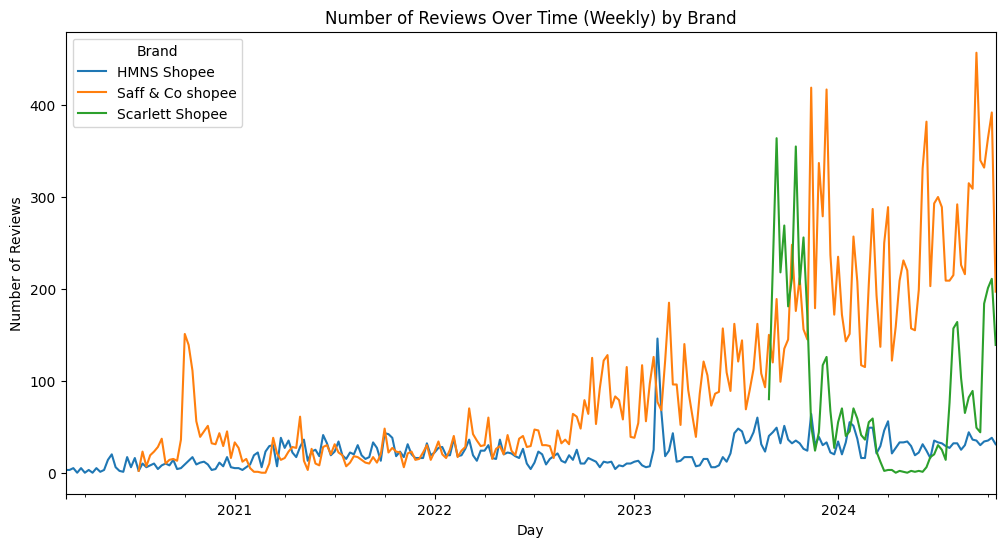

In [19]:
givaudan_df['Review Date'] = pd.to_datetime(givaudan_df['Review Date'])

# Group reviews by week
weekly_comments = givaudan_df.groupby('Brand').resample('W', on='Review Date').size().unstack(level=0)

# Plot the data
weekly_comments.plot(kind='line', figsize=(12, 6))
plt.xlabel('Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time (Weekly) by Brand')
plt.legend(title='Brand')
plt.show()

In [92]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

givaudan_df['Translation'] = givaudan_df['Translation'].astype(str)
all_text = ' '.join(givaudan_df['Translation'])

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return tokens
    return []

processed_text = preprocess(all_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary([processed_text])
corpus = [dictionary.doc2bow(processed_text)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leeju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leeju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\leeju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=1, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=1000)

words = topics[0][1].split(' + ')
word_weights = {}

for word in words:
    word = word.split('*')
    word[0] = float(word[0])
    word[1] = word[1].strip('"')
    word_weights[word[1]] = word[0]
print(word_weights)

[(0,
  '0.041*"scent" + 0.023*"fragrance" + 0.022*"really" + 0.021*"nice" + 0.017*"good" + 0.016*"like" + 0.016*"packaging" + 0.015*"texture" + 0.013*"perfume" + 0.012*"longevity" + 0.012*"got" + 0.011*"suitable" + 0.010*"love" + 0.010*"lasts" + 0.010*"sweet" + 0.009*"long" + 0.009*"longlasting" + 0.008*"smells" + 0.008*"thank" + 0.008*"time" + 0.007*"liquid" + 0.007*"fresh" + 0.007*"fast" + 0.006*"arrived" + 0.006*"super" + 0.006*"performance" + 0.006*"fragrant" + 0.006*"tester" + 0.006*"first" + 0.006*"soft" + 0.006*"safe" + 0.005*"bought" + 0.005*"saff" + 0.005*"one" + 0.005*"also" + 0.005*"delivery" + 0.005*"tried" + 0.005*"thanks" + 0.005*"okay" + 0.005*"still" + 0.005*"hours" + 0.004*"strong" + 0.004*"even" + 0.004*"ð" + 0.004*"buy" + 0.004*"quite" + 0.004*"product" + 0.004*"seller" + 0.004*"bit" + 0.004*"smell" + 0.003*"sotb" + 0.003*"yet" + 0.003*"next" + 0.003*"hope" + 0.003*"dont" + 0.003*"try" + 0.003*"co" + 0.003*"much" + 0.003*"day" + 0.003*"floral" + 0.003*"durability" + 

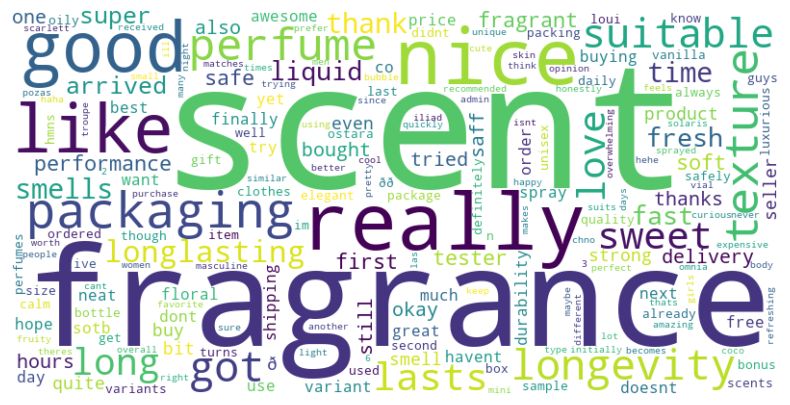

In [103]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [124]:
# Define the categories and sentiments
sentiments = ["positive", "neutral", "negative"]

# Function to get categories for a reviews
def get_review_categories(review):
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {
                "role": "user",
                "content": f"First, identify categories for the following review: '{review}'. Categories include:.\
                    1. Scent: related to smell quality of product, eg. fragrance, strength, etc.\
                    2. Longevity: related to duration of product, eg. how long it lasts, etc.\
                    3. Price: related to cost of purchase, eg. value for money, affordability, etc.\
                    4. Packaging: related to appearance of product, not affected by delivery condition, eg. ease of storage, size, design, etc.\
                    5. Delivery: related to shipping and condition upon delivery, eg. speed, tracking, message before delivery, dents etc.\
                    6. Customer Service: related to seller behaviour, not including thanking seller, eg. response speed, refund speed, attitude etc.\
                    Multiple categories can be chosen, but only include if confident. Do not add any other categories outside the ones stated.\
                    Then, for each category selected, sentiment is also selected, including: {', '.join(sentiments)}.\
                    Respond in a dictionary starting and ending with curly brackets only, format: \"category1\": \"sentiment1\", \"category2\": \"sentiment2\""
            }
        ]
    )
    return response.choices[0].message.content

# random_df = givaudan_df.sample(5)

# Apply the function to the "Review" column
# random_df['Categories'] = random_df['Translation'].apply(get_review_categories)
givaudan_df['Categories'] = givaudan_df['Translation'].apply(get_review_categories)

KeyboardInterrupt: 

In [125]:
# random_df.to_excel('Givaudan/Givaudan_Reviews_with_Categories.xlsx', index=False)

# Display the dataframe with the new "Categories" column
givaudan_df.to_excel('Givaudan/Givaudan_Reviews_with_Categories.xlsx', index=False)


,Brand,Product,Product Name,Product URL,Qty Sold,No of Reviews,Avg Rating,Username,Review Date,Translation,Processed_Translation,Categories
0,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,a*****r,11/16/2022,Texture liquid Performance lasts long enough 4...,"[texture, liquid, performance, lasts, long, en...","{\n ""Scent"": ""positive"",\n ""Longevity"": ..."
1,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,f*****r,09/13/2022,Performance Fragrance Suitable For Perfume Tex...,"[performance, fragrance, suitable, perfume, te...","{\n ""Scent"": ""positive"",\n ""Longevity"": ..."
2,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,w*****n,06/30/2023,Suitable For daily use Texture liquid Performa...,"[suitable, daily, use, texture, liquid, perfor...","{\n ""Scent"": ""positive"",\n ""Price"": ""pos..."
3,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,pegiangelia,10/19/2022,Suitable For unisex Texture liquid Performance...,"[suitable, unisex, texture, liquid, performanc...","{\n ""Scent"": ""positive"",\n ""Customer Ser..."
4,Saff & Co shopee,Loui,SAFF & Co. Extrait de Parfum - LOUI,https://shopee.co.id/SAFF-Co.-Extrait-de-Parfu...,10000,238000,4.9,c*****a,07/12/2021,"Packaging very unique and nice, safe and no le...","[packaging, unique, nice, safe, leaks, longevi...","{""Scent"": ""positive"", ""Longevity"": ""positive"",..."
